In [38]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target=df['Outcome']
df.pop('Outcome')

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
scale=StandardScaler()
scale.fit(df)
scaled_data=scale.transform(df)
outcome=target.to_numpy()

In [5]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, outcome, test_size=0.25, random_state=123)

In [7]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [8]:
#kNN
k=3

y_pred=[]
#Predict
for x in X_test:
    dis = [euclidean_distance(x, x_t) for x_t in X_train]
    sorted_dis=np.argsort(dis)
    k_sorted=sorted_dis[:k]
    k_n_labels = [y_train[i] for i in k_sorted]  
    common = Counter(k_n_labels).most_common(1)
    y_pred.append(common[0][0])


In [9]:
print(y_pred)

[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]


In [10]:
print(y_test)

[1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0]


In [19]:
ac1=accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(ac1)

[[98 21]
 [26 47]]
0.7552083333333334


In [20]:
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred1 = classifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred1))
ac2=accuracy_score(y_test, y_pred1)
print(ac2)

[[98 21]
 [26 47]]
0.7552083333333334


In [43]:
accu=np.array([ac1,ac2])
name=np.array(["Implemented","Built-in"])
print(accu)

[0.75520833 0.75520833]


<BarContainer object of 2 artists>

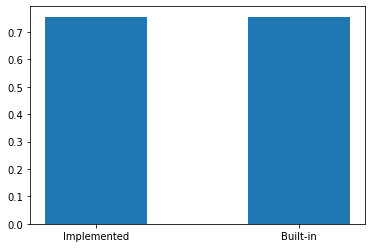

In [44]:
plt.bar(name,accu,width=.5)